In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [49]:
raw_data = pd.read_csv('NFLCombineData.csv')
raw_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0,69.0,205,0.0,...,6.79,42.5,130,24,0,Nebraska,0,0,0,5.9
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0,72.0,198,0.0,...,0.00,0.0,0,12,0,USC,0,0,0,5.6
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,0.0,72.0,221,0.0,...,7.10,39.0,121,19,0,Boise St.,0,0,0,6.0
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0,73.0,227,0.0,...,7.14,36.0,121,24,0,LSU,0,0,0,5.4
4,2015,Mario Alford,Mario,Alford,WR,5,8.0,68.0,180,0.0,...,6.64,34.0,121,13,0,West Virginia,0,0,0,5.3
5,2015,Javorius Allen,Javorius,Allen,RB,6,0.0,72.0,221,0.0,...,6.96,35.5,121,11,0,USC,0,0,0,5.3
6,2015,Adrian Amos,Adrian,Amos,FS,6,0.0,72.0,218,0.0,...,7.09,35.5,122,0,0,Penn St.,0,0,0,5.5
7,2015,Dres Anderson,Dres,Anderson,WR,6,1.0,73.0,187,0.0,...,0.00,0.0,0,13,0,Utah,0,0,0,5.5
8,2015,Henry Anderson,Henry,Anderson,DE,6,6.0,78.0,294,0.0,...,7.20,30.0,111,0,0,Stanford,0,0,0,5.6
9,2015,Rory 'Busta' Anderson,Rory 'Busta',Anderson,TE,6,5.0,77.0,244,0.0,...,0.00,0.0,0,0,0,South Carolina,0,0,0,5.5


In [50]:
raw_data['position'].unique()

array(['RB', 'WR', 'OLB', 'FS', 'DE', 'TE', 'ILB', 'DT', 'P', 'QB', 'OG',
       'OT', 'K', 'FB', 'SS', 'LS', 'CB', 'C', 'NT', 'OC'], dtype=object)

In [59]:
raw_data_no_outlier = raw_data.loc[raw_data['vertical'] > 0]
raw_data_no_outlier = raw_data.loc[raw_data['threecone'] > 0]
raw_data_no_outlier = raw_data.loc[raw_data['broad'] > 0]
raw_data_no_outlier = raw_data.loc[raw_data['bench'] > 0]
raw_data_no_outlier = raw_data.loc[raw_data['round'] > 0]

raw_data_no_outlier

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
320,2014,Jared Abbrederis,Jared,Abbrederis,WR,6,1.0,73.0,195,0.0,...,6.80,30.5,117,4,6,Wisconsin,16,176,0,5.2
321,2014,Davante Adams,Davante,Adams,WR,6,1.0,73.0,212,0.0,...,6.82,39.5,123,14,2,Fresno St.,21,53,0,6.0
322,2014,Mo Alexander,Mo,Alexander,SS,6,1.0,73.0,220,0.0,...,7.05,38.0,123,0,4,Utah St.,14,110,0,4.9
323,2014,Ricardo Allen,Ricardo,Allen,CB,5,9.0,69.0,187,0.0,...,0.00,35.5,117,13,5,Purdue,19,147,0,5.1
324,2014,Jace Amaro,Jace,Amaro,TE,6,5.0,77.0,265,0.0,...,7.42,33.0,118,28,2,Texas Tech,17,49,0,5.4
326,2014,Dri Archer,Dri,Archer,RB,5,8.0,68.0,173,0.0,...,6.86,38.0,122,20,4,Kent St.,1,97,0,5.4
329,2014,Jeremiah Attaochu,Jeremiah,Attaochu,OLB,6,3.0,75.0,252,0.0,...,0.00,0.0,0,0,2,Georgia Tech,18,50,0,5.5
331,2014,Anthony Barr,Anthony,Barr,OLB,6,5.0,77.0,255,0.0,...,6.82,34.5,119,15,1,UCLA,9,9,0,6.6
332,2014,Lamin Barrow,Lamin,Barrow,OLB,6,1.0,73.0,237,0.0,...,7.24,35.0,123,22,5,LSU,28,156,0,5.4
333,2014,Odell Beckham,Odell,Beckham,WR,5,11.0,71.0,198,0.0,...,6.69,38.5,122,7,1,LSU,12,12,0,5.9


In [53]:
position_data = raw_data_no_outlier.groupby(['position'])
position_data.apply(print)

     year                name  firstname  lastname position  heightfeet  \
85   2015      Reese Dismukes      Reese  Dismukes        C           6   
97   2015      Cameron Erving    Cameron    Erving        C           6   
103  2015         B.J. Finney       B.J.    Finney        C           6   
111  2015         Andy Gallik       Andy    Gallik        C           6   
199  2015          Ali Marpet        Ali    Marpet        C           6   
342  2014      Russell Bodine    Russell    Bodine        C           6   
441  2014  Jonotthan Harrison  Jonotthan  Harrison        C           6   
460  2014          Gabe Ikard       Gabe     Ikard        C           6   
489  2014        Tyler Larsen      Tyler    Larsen        C           6   
500  2014       Corey Linsley      Corey   Linsley        C           6   
516  2014       Marcus Martin     Marcus    Martin        C           6   
551  2014     Matthew Paradis    Matthew   Paradis        C           6   
575  2014     Weston Rich

      year                  name  firstname       lastname position  \
3     2015        Kwon Alexander       Kwon      Alexander      OLB   
13    2015           Neiron Ball     Neiron           Ball      OLB   
16    2015           Vic Beasley        Vic        Beasley      OLB   
68    2015  Yannik Cudjoe-Virgil     Yannik  Cudjoe-Virgil      OLB   
71    2015           Aaron Davis      Aaron          Davis      OLB   
82    2015       Xzavier Dickson    Xzavier        Dickson      OLB   
91    2015           B.J. Dubose       B.J.         Dubose      OLB   
96    2015          Kyle Emanuel       Kyle        Emanuel      OLB   
108   2015             Alani Fua      Alani            Fua      OLB   
128   2015         Randy Gregory      Randy        Gregory      OLB   
152   2015          Jordan Hicks     Jordan          Hicks      OLB   
157   2015             Mike Hull       Mike           Hull      OLB   
202   2015       Lorenzo Mauldin    Lorenzo        Mauldin      OLB   
220   

""


In [54]:
rb_data = raw_data.loc[raw_data['position'] == 'RB']
rb_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0,69.0,205,0.0,...,6.79,42.5,130,24,0,Nebraska,0,0,0,5.9
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,0.0,72.0,221,0.0,...,7.10,39.0,121,19,0,Boise St.,0,0,0,6.0
5,2015,Javorius Allen,Javorius,Allen,RB,6,0.0,72.0,221,0.0,...,6.96,35.5,121,11,0,USC,0,0,0,5.3
12,2015,Cameron Artis-Payne,Cameron,Artis-Payne,RB,5,10.0,70.0,212,0.0,...,7.13,36.5,118,0,0,Auburn,0,0,0,5.4
31,2015,Dominique Brown,Dominique,Brown,RB,6,2.0,74.0,234,0.0,...,0.00,0.0,0,17,0,Louisville,0,0,0,5.0
33,2015,Malcolm Brown,Malcolm,Brown,RB,5,11.0,71.0,224,0.0,...,6.86,34.5,117,19,0,Texas,0,0,0,5.2
42,2015,B.J. Catalon,B.J.,Catalon,RB,5,7.0,67.0,186,0.0,...,6.90,36.0,114,0,0,TCU,0,0,0,5.1
52,2015,David Cobb,David,Cobb,RB,5,11.0,71.0,229,0.0,...,0.00,38.5,121,17,0,Minnesota,0,0,0,5.5
55,2015,Tevin Coleman,Tevin,Coleman,RB,5,11.0,71.0,206,0.0,...,0.00,0.0,0,22,0,Indiana,0,0,0,6.1
66,2015,John Crockett,John,Crockett,RB,6,0.0,72.0,217,0.0,...,7.15,40.0,125,15,0,North Dakota St.,0,0,0,5.2


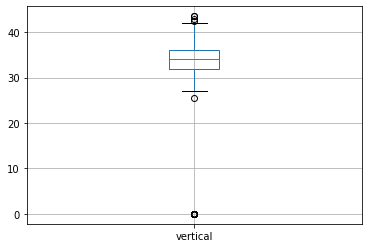

In [36]:
rb_data.boxplot(column=['vertical'])

In [ ]:
rb_data.boxplot(column=['vertical'])

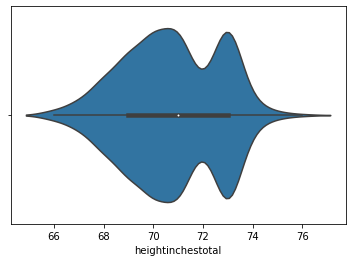

In [57]:
sns.violinplot(x=rb_data["heightinchestotal"])

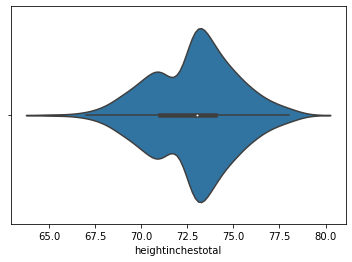

In [58]:
sns.violinplot(x=wr_data["heightinchestotal"])

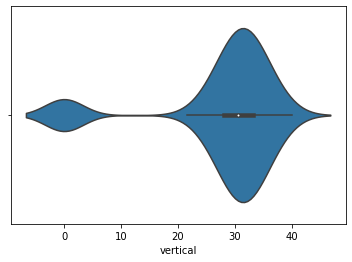

In [39]:
sns.violinplot(x=qb_data["vertical"])

In [31]:
qb_data = raw_data.loc[raw_data['position'] == 'QB']
qb_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
19,2015,Bryan Bennett,Bryan,Bennett,QB,6,2.0,74.0,211,0.0,...,7.13,37.0,125,0,0,Southeastern Louisiana,0,0,0,0.0
25,2015,Anthony Boone,Anthony,Boone,QB,6,0.0,72.0,231,0.0,...,7.47,26.5,100,0,0,Duke,0,0,0,5.0
28,2015,Brandon Bridge,Brandon,Bridge,QB,6,4.0,76.0,229,0.0,...,7.18,33.0,110,0,0,South Alabama,0,0,0,5.0
39,2015,Shane Carden,Shane,Carden,QB,6,2.0,74.0,218,0.0,...,7.17,29.5,104,0,0,East Carolina,0,0,0,5.1
100,2015,Cody Fajardo,Cody,Fajardo,QB,6,1.0,73.0,223,0.0,...,6.95,32.5,118,0,0,Nevada,0,0,0,5.0
124,2015,Garrett Grayson,Garrett,Grayson,QB,6,2.0,74.0,213,0.0,...,0.00,0.0,0,0,0,Colorado St.,0,0,0,5.4
136,2015,Connor Halliday,Connor,Halliday,QB,6,3.0,75.0,196,0.0,...,0.00,0.0,0,0,0,Washington St.,0,0,0,5.1
159,2015,Brett Hundley,Brett,Hundley,QB,6,3.0,75.0,226,0.0,...,6.93,36.0,120,0,0,UCLA,0,0,0,5.5
190,2015,Jerry Lovelocke,Jerry,Lovelocke,QB,6,4.0,76.0,248,0.0,...,7.30,31.5,113,0,0,Prairie View A&M,0,0,0,0.0
195,2015,Sean Mannion,Sean,Mannion,QB,6,6.0,78.0,229,0.0,...,7.29,31.0,105,0,0,Oregon St.,0,0,0,5.3


In [32]:
wr_data = raw_data.loc[raw_data['position'] == 'WR']
wr_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0,72.0,198,0.0,...,0.00,0.0,0,12,0,USC,0,0,0,5.6
4,2015,Mario Alford,Mario,Alford,WR,5,8.0,68.0,180,0.0,...,6.64,34.0,121,13,0,West Virginia,0,0,0,5.3
7,2015,Dres Anderson,Dres,Anderson,WR,6,1.0,73.0,187,0.0,...,0.00,0.0,0,13,0,Utah,0,0,0,5.5
18,2015,Kenny Bell,Kenny,Bell,WR,6,1.0,73.0,197,0.0,...,6.66,41.5,129,7,0,Nebraska,0,0,0,5.4
30,2015,Da'Ron Brown,Da'Ron,Brown,WR,6,0.0,72.0,205,0.0,...,7.04,37.0,120,17,0,Northern Illinois,0,0,0,4.9
48,2015,Kaelin Clay,Kaelin,Clay,WR,5,10.0,70.0,195,0.0,...,6.97,33.0,113,10,0,Utah,0,0,0,5.1
51,2015,Sammie Coates,Sammie,Coates,WR,6,1.0,73.0,212,0.0,...,6.98,41.0,131,23,0,Auburn,0,0,0,5.6
59,2015,Chris Conley,Chris,Conley,WR,6,2.0,74.0,213,0.0,...,7.06,45.0,139,18,0,Georgia,0,0,0,5.5
60,2015,Amari Cooper,Amari,Cooper,WR,6,1.0,73.0,211,0.0,...,6.71,33.0,120,0,0,Alabama,0,0,0,7.0
67,2015,Jamison Crowder,Jamison,Crowder,WR,5,8.0,68.0,185,0.0,...,7.17,37.0,115,10,0,Duke,0,0,0,5.4


In [33]:
te_data = raw_data.loc[raw_data['position'] == 'TE']
te_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
9,2015,Rory 'Busta' Anderson,Rory 'Busta',Anderson,TE,6,5.0,77.0,244,0.0,...,0.00,0.0,0,0,0,South Carolina,0,0,0,5.5
17,2015,Blake Bell,Blake,Bell,TE,6,6.0,78.0,252,0.0,...,0.00,33.0,116,14,0,Oklahoma,0,0,0,5.2
21,2015,E.J. Bibbs,E.J.,Bibbs,TE,6,2.0,74.0,258,0.0,...,0.00,0.0,0,20,0,Iowa St.,0,0,0,5.0
27,2015,Nick Boyle,Nick,Boyle,TE,6,4.0,76.0,268,0.0,...,0.00,30.5,112,20,0,Delaware,0,0,0,5.2
45,2015,Gerald Christian,Gerald,Christian,TE,6,3.0,75.0,244,0.0,...,0.00,0.0,0,28,0,Louisville,0,0,0,5.3
49,2015,Cameron Clear,Cameron,Clear,TE,6,5.0,77.0,277,0.0,...,0.00,32.0,108,0,0,Texas A&M,0,0,0,4.8
81,2015,A.J. Derby,A.J.,Derby,TE,6,4.0,76.0,255,0.0,...,0.00,0.0,0,15,0,Arkansas,0,0,0,5.3
150,2015,Jeff Heuerman,Jeff,Heuerman,TE,6,5.0,77.0,254,0.0,...,0.00,0.0,0,26,0,Ohio St.,0,0,0,5.4
164,2015,Jesse James,Jesse,James,TE,6,7.0,79.0,261,0.0,...,0.00,37.5,121,26,0,Penn St.,0,0,0,5.1
180,2015,Ben Koyack,Ben,Koyack,TE,6,5.0,77.0,255,0.0,...,0.00,0.0,0,0,0,Notre Dame,0,0,0,5.4


In [34]:
olb_data = raw_data.loc[raw_data['position'] == 'OLB']
olb_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0,73.0,227,0.0,...,7.14,36.0,121,24,0,LSU,0,0,0,5.4
13,2015,Neiron Ball,Neiron,Ball,OLB,6,2.0,74.0,236,0.0,...,0.00,0.0,0,22,0,Florida,0,0,0,4.9
16,2015,Vic Beasley,Vic,Beasley,OLB,6,3.0,75.0,246,0.0,...,6.91,41.0,130,35,0,Clemson,0,0,0,6.1
68,2015,Yannik Cudjoe-Virgil,Yannik,Cudjoe-Virgil,OLB,6,2.0,74.0,248,0.0,...,0.00,0.0,0,25,0,Maryland,0,0,0,4.8
71,2015,Aaron Davis,Aaron,Davis,OLB,6,0.0,72.0,225,0.0,...,7.38,29.0,107,16,0,Colorado St.,0,0,0,5.2
82,2015,Xzavier Dickson,Xzavier,Dickson,OLB,6,3.0,75.0,260,0.0,...,7.56,29.5,100,19,0,Alabama,0,0,0,5.1
91,2015,B.J. Dubose,B.J.,Dubose,OLB,6,4.0,76.0,284,0.0,...,0.00,0.0,0,26,0,Louisville,0,0,0,5.2
92,2015,Bud Dupree,Bud,Dupree,OLB,6,4.0,76.0,269,0.0,...,0.00,42.0,138,0,0,Kentucky,0,0,0,5.9
96,2015,Kyle Emanuel,Kyle,Emanuel,OLB,6,3.0,75.0,255,0.0,...,7.10,34.0,120,27,0,North Dakota St.,0,0,0,5.5
108,2015,Alani Fua,Alani,Fua,OLB,6,5.0,77.0,238,0.0,...,6.83,34.5,118,18,0,BYU,0,0,0,5.3
